In [426]:
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import cv2
import os

In [427]:
paths = ["D:/pd1/siim-covid19-detection/train/000c9c05fd14/e555410bd2cd/51759b5579bc.dcm",
        "D:/pd1/siim-covid19-detection/train/00c74279c5b7/ca867739fd1b/136af218f8df.dcm",
        "D:/pd1/siim-covid19-detection/train/0ba072188224/9cf32bd76ce1/6ea6f1a79e68.dcm",
        "D:/pd1/siim-covid19-detection/train/0f98e00ec7c1/7c08043af484/ea56b964075b.dcm",
        "D:/pd1/siim-covid19-detection/train/01ed923839d7/d23a4ac4033c/a82f4bf3f6be.dcm"]

Dane obrazowe Stworzyć pipeline do preprocessingu, aby działał z każdą bazą danych zdjęciową z zespołu.   
W celach testowych ograniczyć liczbę zdjęć z każdej bazy do kilku (aby dało się to odznaczyć).  
Narzędzie ma służyć w przyszłości do szybkiego łączenia kilku baz danych w jeden zbiór treningowy.  
Nie zmieniać sztucznie folderów, w których znajdują się pierwotnie zdjęcia z bazy danych.  
W preprocesingu przygotować ujednolicenie rozmiaru zdjęć do wybranego rozmiaru, jedna operacja przeskalowania wartości pikseli lub operacja na histogramie oraz minimum jedna inna operacja na obrazie (uzasadnić wybór w oparciu o różnice między bazami danych, które badaliście w poprzednich pracach domowych).

wszystkie zdjęcia RTG jakie mamy są jednokanałowe, rozmiary w jednej bazie są 1024x1024, w drugiej rozmiar jest raczej mniejszy, w trzeciej raczej większy, w takim razie spróbuję wszystkie zdjęcia sprowadzić do rozmiaru 1024x1024, w ten sposób część zdjęć nie zostanie naruszona.  
przeskalowanie kolorów do przedziału 0-255  
wyrównanie histogramów  
cv2 - usuwanie szumów

In [428]:
def path_to_image(path):
    name, extension = os.path.splitext(path)
    if extension == '.dcm':
        try:
            ds = pydicom.dcmread(path)
            array = ds.pixel_array
            img = Image.fromarray(array)
        except:
            pass
    else:
        img = Image.open(path)
    return img

In [463]:
def processing(img):
    #resize
    img = img.resize((1024,1024))
    
    #rescale colours
    array = np.array(img)
    array = array/array.max()*255
    array = array.astype(int)
    img = Image.fromarray(array)
    
    #histogram equalization
    hist,bins = np.histogram(img,256,[0,256])

    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    
    img = cdf[img]
    img = cv2.fastNlMeansDenoising(img)
    img = Image.fromarray(img)
    return img

In [464]:
#1

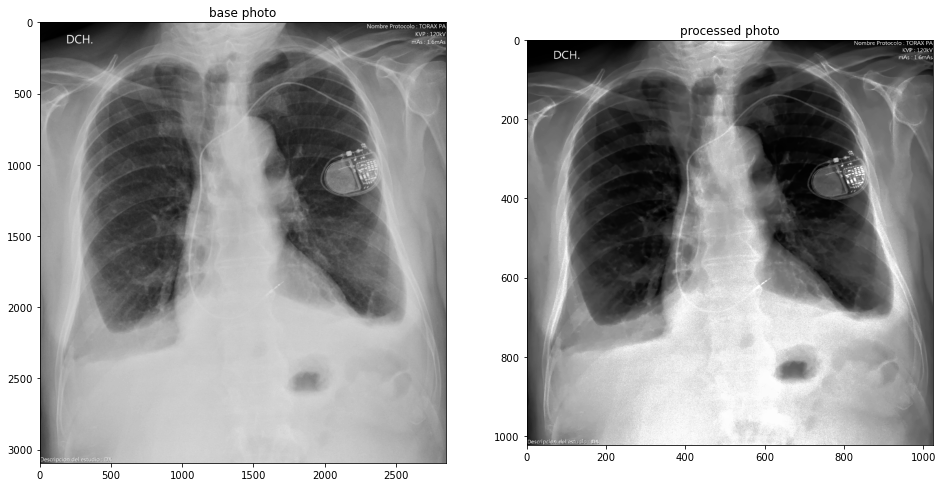

In [465]:
img_base = path_to_image(paths[0])
img = processing(img_base)
f, axarr = plt.subplots(1,2, figsize = (16,12))
axarr[0].imshow(img_base, cmap = 'gray')
axarr[1].imshow(img, cmap = 'gray')
axarr[0].set_title('base photo')
axarr[1].set_title('processed photo')
plt.show()

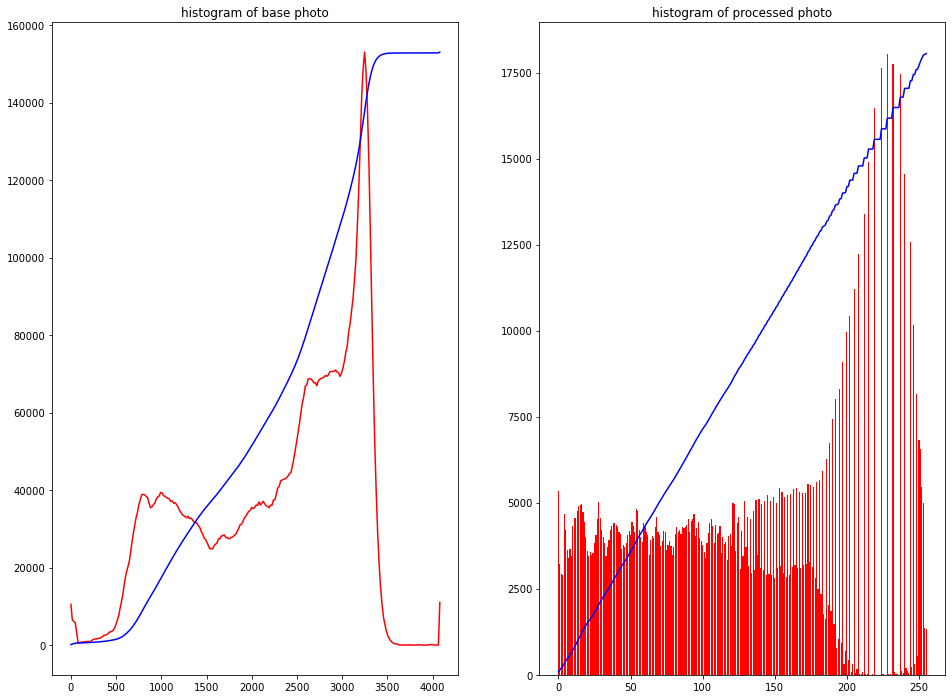

In [466]:
f, axarr = plt.subplots(1,2, figsize = (16,12))
hist,bins = np.histogram(img_base,256)
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

axarr[0].plot(bins[0:-1], hist, color = 'red')
axarr[0].plot(bins[0:-1], cdf_normalized, color = 'b')
axarr[0].set_title('histogram of base photo')


hist,bins = np.histogram(img,256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
axarr[1].bar(bins[0:-1], hist, color = 'red')
axarr[1].plot(cdf_normalized, color = 'b')
axarr[1].set_title('histogram of processed photo')
plt.show()

In [467]:
#2

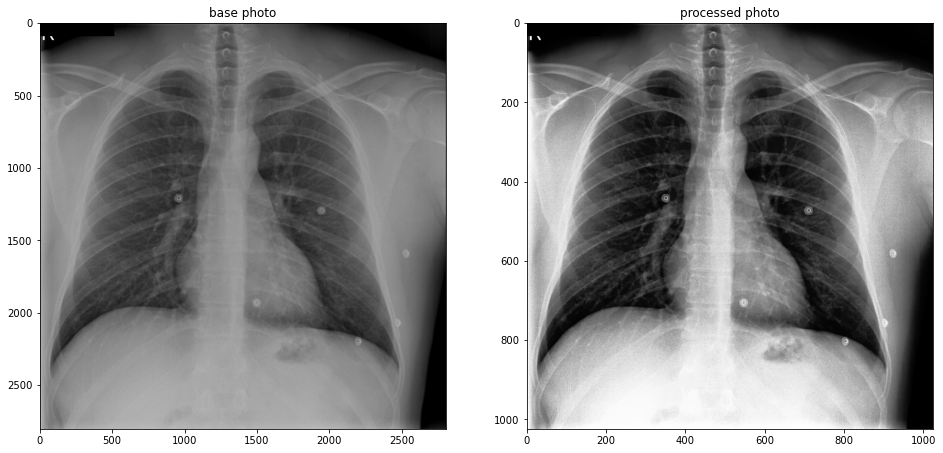

In [468]:
img_base = path_to_image(paths[1])
img = processing(img_base)
f, axarr = plt.subplots(1,2, figsize = (16,12))
axarr[0].imshow(img_base, cmap = 'gray')
axarr[1].imshow(img, cmap = 'gray')
axarr[0].set_title('base photo')
axarr[1].set_title('processed photo')
plt.show()

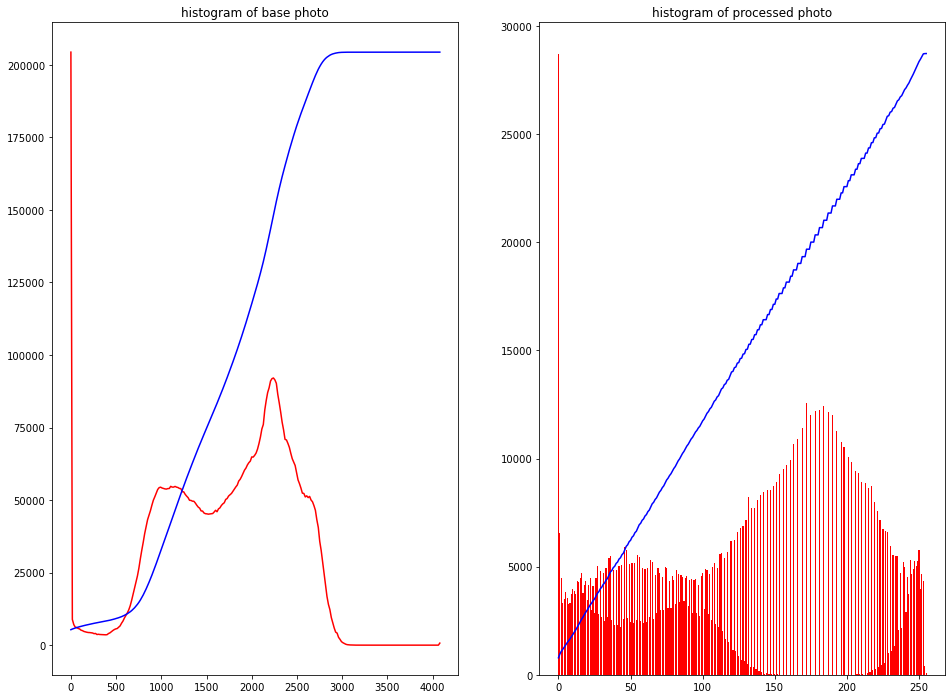

In [469]:
f, axarr = plt.subplots(1,2, figsize = (16,12))
hist,bins = np.histogram(img_base,256)
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

axarr[0].plot(bins[0:-1], hist, color = 'red')
axarr[0].plot(bins[0:-1], cdf_normalized, color = 'b')
axarr[0].set_title('histogram of base photo')


hist,bins = np.histogram(img,256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
axarr[1].bar(bins[0:-1], hist, color = 'red')
axarr[1].plot(cdf_normalized, color = 'b')
axarr[1].set_title('histogram of processed photo')
plt.show()

In [470]:
#3

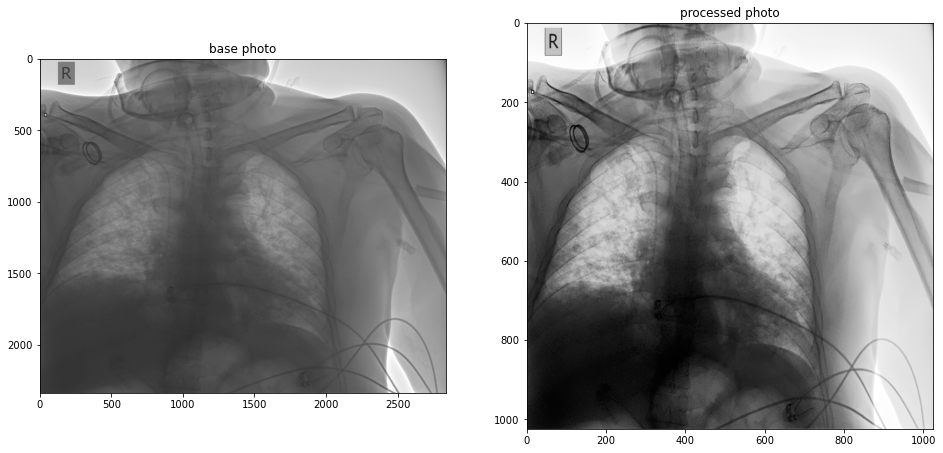

In [471]:
img_base = path_to_image(paths[2])
img = processing(img_base)
f, axarr = plt.subplots(1,2, figsize = (16,12))
axarr[0].imshow(img_base, cmap = 'gray')
axarr[1].imshow(img, cmap = 'gray')
axarr[0].set_title('base photo')
axarr[1].set_title('processed photo')
plt.show()

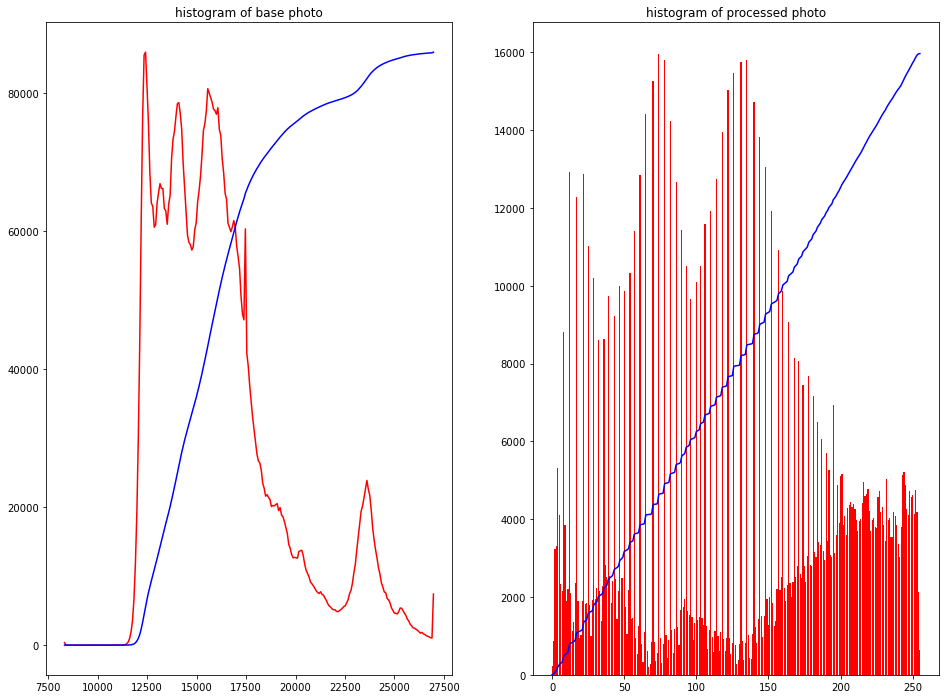

In [472]:
f, axarr = plt.subplots(1,2, figsize = (16,12))
hist,bins = np.histogram(img_base,256)
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

axarr[0].plot(bins[0:-1], hist, color = 'red')
axarr[0].plot(bins[0:-1], cdf_normalized, color = 'b')
axarr[0].set_title('histogram of base photo')


hist,bins = np.histogram(img,256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
axarr[1].bar(bins[0:-1], hist, color = 'red')
axarr[1].plot(cdf_normalized, color = 'b')
axarr[1].set_title('histogram of processed photo')
plt.show()

In [473]:
#4

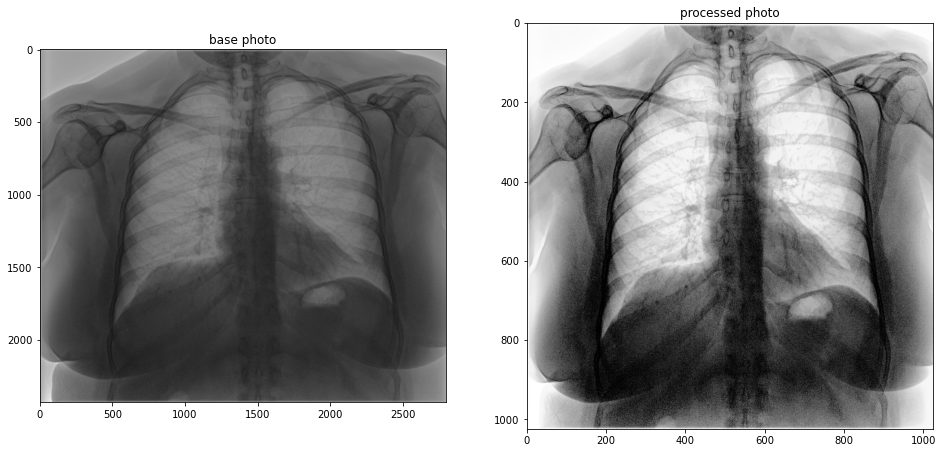

In [474]:
img_base = path_to_image(paths[3])
img = processing(img_base)
f, axarr = plt.subplots(1,2, figsize = (16,12))
axarr[0].imshow(img_base, cmap = 'gray')
axarr[1].imshow(img, cmap = 'gray')
axarr[0].set_title('base photo')
axarr[1].set_title('processed photo')
plt.show()

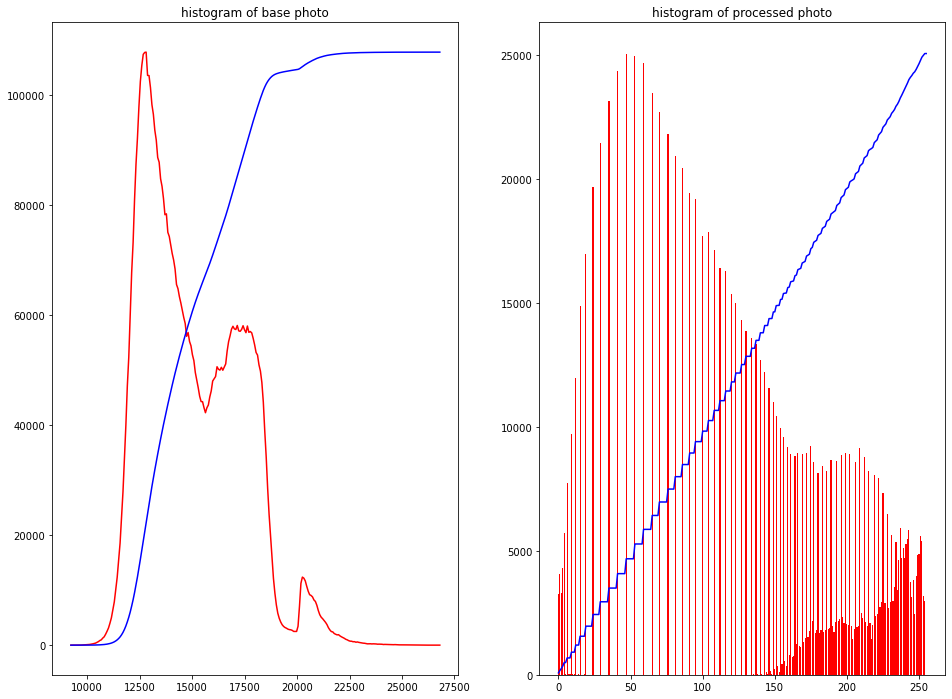

In [475]:
f, axarr = plt.subplots(1,2, figsize = (16,12))
hist,bins = np.histogram(img_base,256)
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

axarr[0].plot(bins[0:-1], hist, color = 'red')
axarr[0].plot(bins[0:-1], cdf_normalized, color = 'b')
axarr[0].set_title('histogram of base photo')


hist,bins = np.histogram(img,256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
axarr[1].bar(bins[0:-1], hist, color = 'red')
axarr[1].plot(cdf_normalized, color = 'b')
axarr[1].set_title('histogram of processed photo')
plt.show()

In [476]:
#5

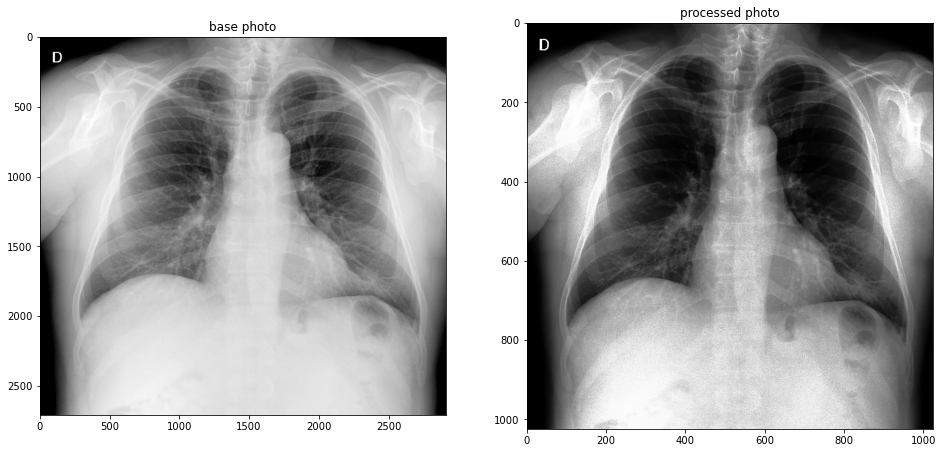

In [477]:
img_base = path_to_image(paths[4])
img = processing(img_base)
f, axarr = plt.subplots(1,2, figsize = (16,12))
axarr[0].imshow(img_base, cmap = 'gray')
axarr[1].imshow(img, cmap = 'gray')
axarr[0].set_title('base photo')
axarr[1].set_title('processed photo')
plt.show()

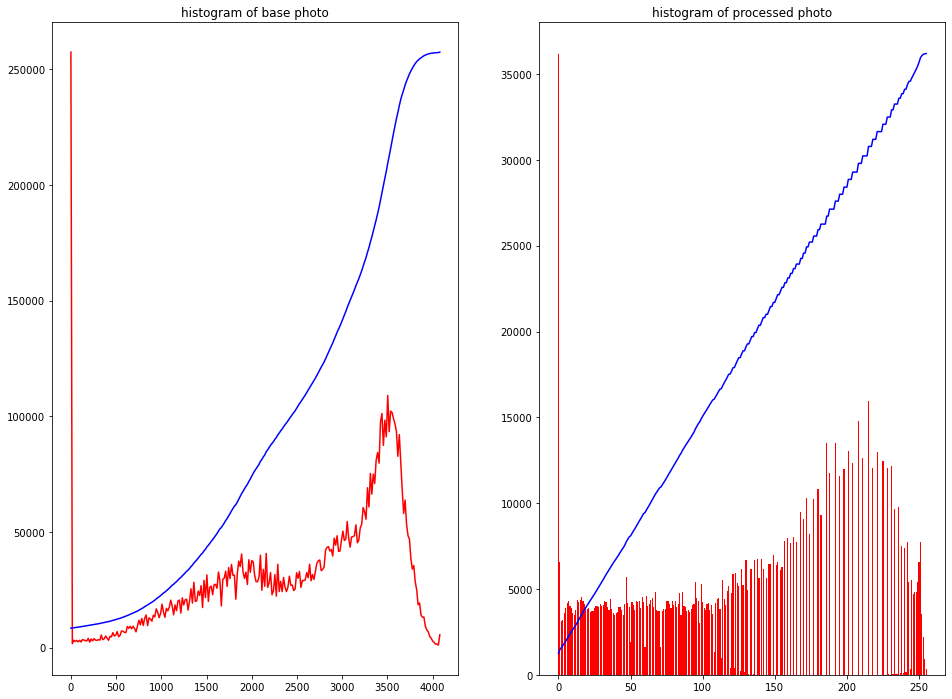

In [478]:
f, axarr = plt.subplots(1,2, figsize = (16,12))
hist,bins = np.histogram(img_base,256)
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

axarr[0].plot(bins[0:-1], hist, color = 'red')
axarr[0].plot(bins[0:-1], cdf_normalized, color = 'b')
axarr[0].set_title('histogram of base photo')


hist,bins = np.histogram(img,256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
axarr[1].bar(bins[0:-1], hist, color = 'red')
axarr[1].plot(cdf_normalized, color = 'b')
axarr[1].set_title('histogram of processed photo')
plt.show()